# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
for city in cities:
    print(city)
   

attawapiskat
san andres
albany
pangnirtung
qaanaaq
isla vista
port alfred
punta arenas
penzance
san patricio
khatanga
sunland park
dingle
ribeira grande
mataura
hobart
jashpurnagar
saskylakh
carmelo
carnarvon
arraial do cabo
ilulissat
choix
teguldet
mont-dore
bluff
hilton head island
ancud
soe
mamallapuram
srandakan
chokurdakh
lucapa
mar del plata
lusambo
grindavik
huarmey
kodiak
vaini
safwah
aasiaat
cape town
cuamba
baruun-urt
sitka
sao felix do xingu
palencia
hermanus
shaowu
saint-philippe
tuktoyaktuk
illoqqortoormiut
svetlogorsk
jamestown
kapaa
gorontalo
hamilton
vardo
busselton
swellendam
taolanaro
bethel
hofn
bucak
tiksi
ponta delgada
omboue
talnakh
rikitea
faanui
airai
bredasdorp
pevek
tecoanapa
ushuaia
bulungu
mys shmidta
te anau
vila velha
kunya
belushya guba
urdoma
prince george
matara
cienfuegos
bengkulu
wajir
new norfolk
la ronge
yellowknife
rawannawi
xaghra
butaritari
olafsvik
honiara
georgetown
itarema
magistralnyy
castro
ixtapa
ust-kamchatsk
marawi
nikolskoye
sungaipenuh


In [60]:
 print(len(cities))

620


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city_list = []
lat_list = []
maxtemp_list = []
humidity_list= []
cloudiness_list = []
windspeed_list = []

# loop through cities and make api calls for each
for city in cities:
    try:
        
        query_url = url + "appid=" + api_key + "&q=" + city
        response = requests.get(query_url).json()
                
        maxtemp = response['main']['temp_max']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        cloudiness = response['clouds']['all']
        windspeed = response['wind']['speed']
        
        city_list.append(city)
        maxtemp_list.append(maxtemp)
        lat_list.append(lat)
        humidity_list.append(humidity)
        cloudiness_list.append(cloudiness)
        windspeed_list.append(windspeed)
        
    except:
        print(city + " not found in api data")
        

attawapiskat not found in api data
safwah not found in api data
illoqqortoormiut not found in api data
taolanaro not found in api data
mys shmidta not found in api data
belushya guba not found in api data
bengkulu not found in api data
rawannawi not found in api data
olafsvik not found in api data
ust-kamchatsk not found in api data
dolbeau not found in api data
umzimvubu not found in api data
sao francisco de assis not found in api data
satitoa not found in api data
gangotri not found in api data
amderma not found in api data
azar shahr not found in api data
aktash not found in api data
phan rang not found in api data
vaitupu not found in api data
tumannyy not found in api data
barentsburg not found in api data
iskele not found in api data
paradwip not found in api data
tuggurt not found in api data
grand river south east not found in api data
tsihombe not found in api data
tahta not found in api data
stornoway not found in api data
samusu not found in api data
labrea not found in api

In [62]:
#create a data dictionary
city_dict = {
    "city name": city_list,
    "Lat" : lat_list,
    "Max Temp" : maxtemp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list
       }
    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
weather_data = pd.DataFrame(city_dict)
weather_data.head()

,city name,Lat,Max Temp,Humidity,Cloudiness
0,san andres,13.32,299.35,100,0
1,albany,42.65,278.15,31,40
2,pangnirtung,66.15,258.15,65,75
3,qaanaaq,77.48,257.90,84,44
4,isla vista,34.41,298.71,46,1


In [74]:
nohemispherecities = pd.DataFrame(weather_data.Lat > 0)
sohemispherecities = pd.DataFrame(weather_data.Lat < 0)
print(len(nohemispherecities))
print(len(sohemispherecities))

569
569


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

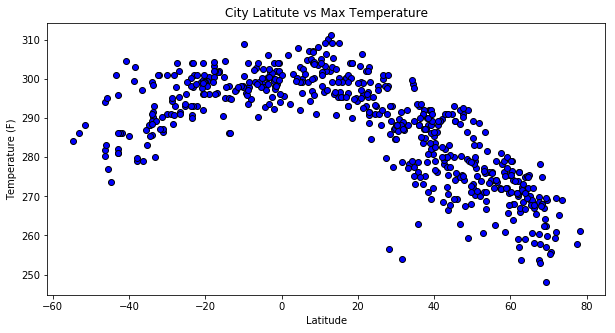

In [64]:
plt.figure(figsize=(10,5))
plt.scatter(x=lat_list, y=maxtemp_list, marker="o", facecolors="blue", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("City Latitute vs Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

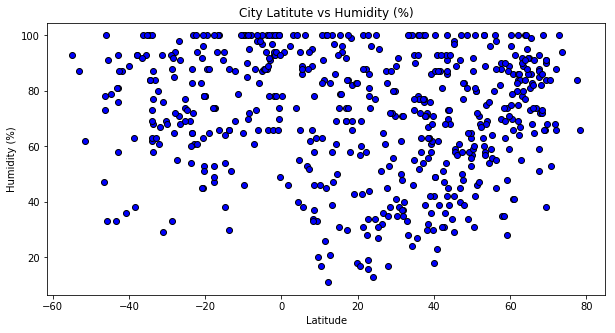

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(x=lat_list, y=humidity_list, marker="o", facecolors="blue", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("City Latitute vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


#### Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

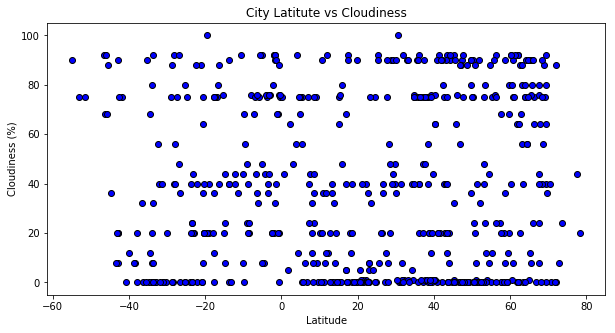

In [66]:
plt.figure(figsize=(10,5))
plt.scatter(x=lat_list, y=cloudiness_list, marker="o", facecolors="blue", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("City Latitute vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

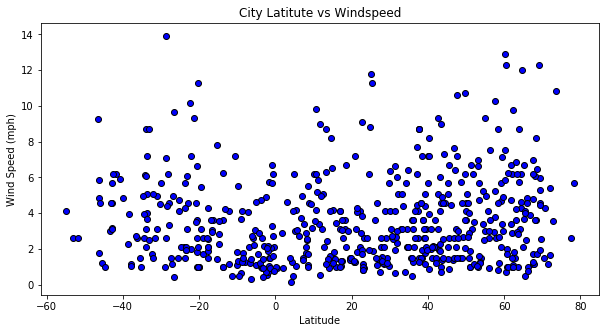

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(x=lat_list, y=windspeed_list, marker="o", facecolors="blue", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("City Latitute vs Windspeed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")